In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Software houses PK .csv")

In [4]:
print(df.head())

                Company Name        City  \
0           BIZNET SOLUTIONS     Karachi   
1  Download Payroll Software  Dera Bugti   
2           Cherry Berry UCM      Lahore   
3                    Speecto  Faisalabad   
4     AI Development Company      Lahore   

                                             Address  \
0  Suite #411, Anum Blessing, Block-78, K.C.H.S.,...   
1  Patel Nagar, Delhi, 110011 Dera Bugti, Balochi...   
2  Offices 208, 314 - Siddiq Trade Center Main Bo...   
3  188 D Ground, Block D People's Colony No 1, Fa...   
4  Plot 15, Civic Centre Block D 2 Phase 1 Johar ...   

                 Contact No                                           Services  
0  03008227997, 02134325151  website design development, digital media mark...  
1  09868337762, 09868337762                                                  -  
2              924235781943                                                  -  
3              (041)6074905                                               

In [9]:
city_col = None
for c in df.columns:
    if c.lower().strip() == "city":
        city_col = c
        break

cities = df[city_col].fillna("").astype(str)

In [10]:
city_count = {}
for c in cities:
    c = c.strip()
    if c != "":
        if c not in city_count:
            city_count[c] = 1
        else:
            city_count[c] += 1

for k in sorted(city_count, key=city_count.get, reverse=True):
    print(k, city_count[k])


Islamabad 225
Karachi 217
Lahore 138
Faisalabad 35
Rawalpindi 26
Quetta 17
Sialkot 13
Multan 4
Gujranwala 4
Hyderabad 4
Peshawar 2
Rahimyar Khan 2
Jhelum 2
Talagang 2
Bahawalpur 2
Abbottabad 2
Dera Bugti 1
Sargodha 1
Alipur Chattha 1


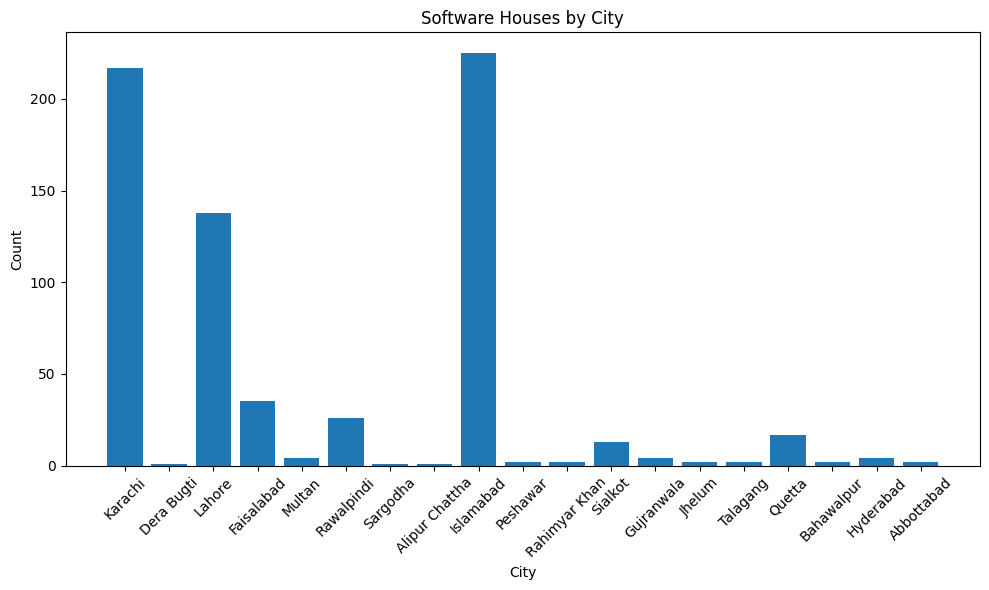

In [11]:
plt.figure(figsize=(10,6))
plt.bar(list(city_count.keys()), list(city_count.values()))
plt.title("Software Houses by City")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
services_col = None
for c in df.columns:
    if "service" in c.lower() or "industry" in c.lower():
        services_col = c
        break

services = df[services_col].fillna("").astype(str)

In [15]:
categories = {
    "web_mobile": ["web", "website", "mobile", "app"],
    "ecommerce": ["ecommerce", "e-commerce", "store"],
    "media": ["media", "content"],
    "ai_ml": ["ai", "machine learning", "ml"],
    "healthcare": ["health", "medical"],
    "other": []
}
category_count = {k:0 for k in categories}

for text in services:
    text_low = text.lower()
    matched = False
    for cat, words in categories.items():
        for w in words:
            if w in text_low:
                category_count[cat] += 1
                matched = True
                break
        if matched:
            break
    if not matched:
        category_count["other"] += 1

for k in sorted(category_count, key=category_count.get, reverse=True):
    print(k, category_count[k])

other 369
web_mobile 295
media 14
ai_ml 11
ecommerce 9
healthcare 1


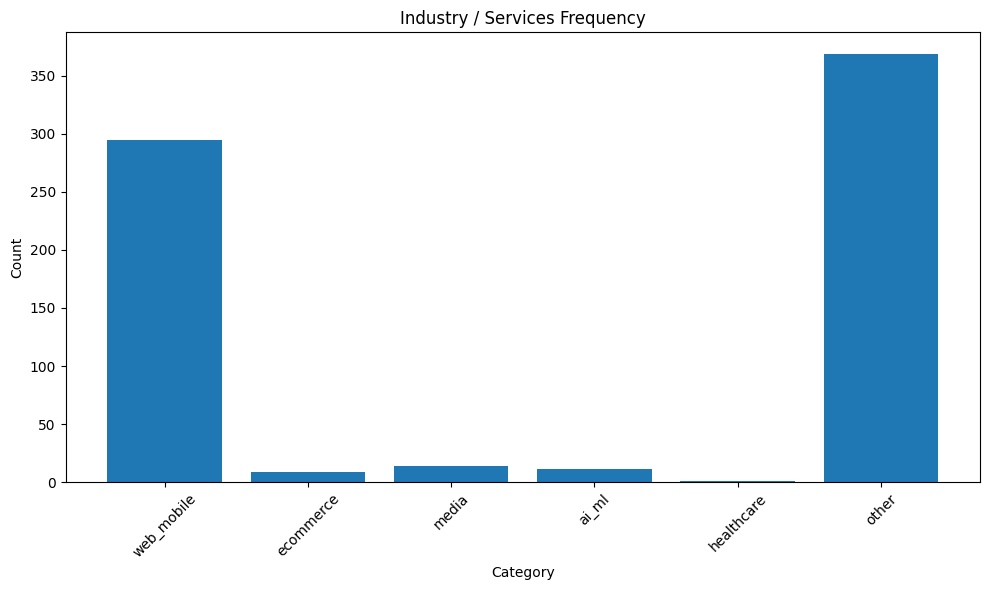

In [16]:
plt.figure(figsize=(10,6))
plt.bar(category_count.keys(), category_count.values())
plt.title("Industry / Services Frequency")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
tech_col = None
for c in df.columns:
    if "tech" in c.lower() or "tools" in c.lower() or "stack" in c.lower():
        tech_col = c
        break

if tech_col is None:
    for c in df.columns:
        if "service" in c.lower():
            tech_col = c
            break

tech_texts = df[tech_col].fillna("").astype(str)

In [18]:
tech_list = [
    "python","java","javascript","php","c++","c#","html","css","sql",
    "android","ios","flutter","react","angular","node","django",
    "laravel","git","aws","azure","gcp"
]

In [21]:
tech_count = {}
for t in tech_list:
    tech_count[t] = 0

for text in tech_texts:
    text_low = text.lower()
    for t in tech_list:
        if t in text_low:
            tech_count[t] += 1

tech_count_clean = {k:v for k,v in tech_count.items() if v>0}
for k in sorted(tech_count_clean, key=tech_count_clean.get, reverse=True):
    print(k, tech_count_clean[k])

git 112
android 21
php 16
ios 7
node 5
react 4
java 3
flutter 2
c# 1
angular 1
laravel 1


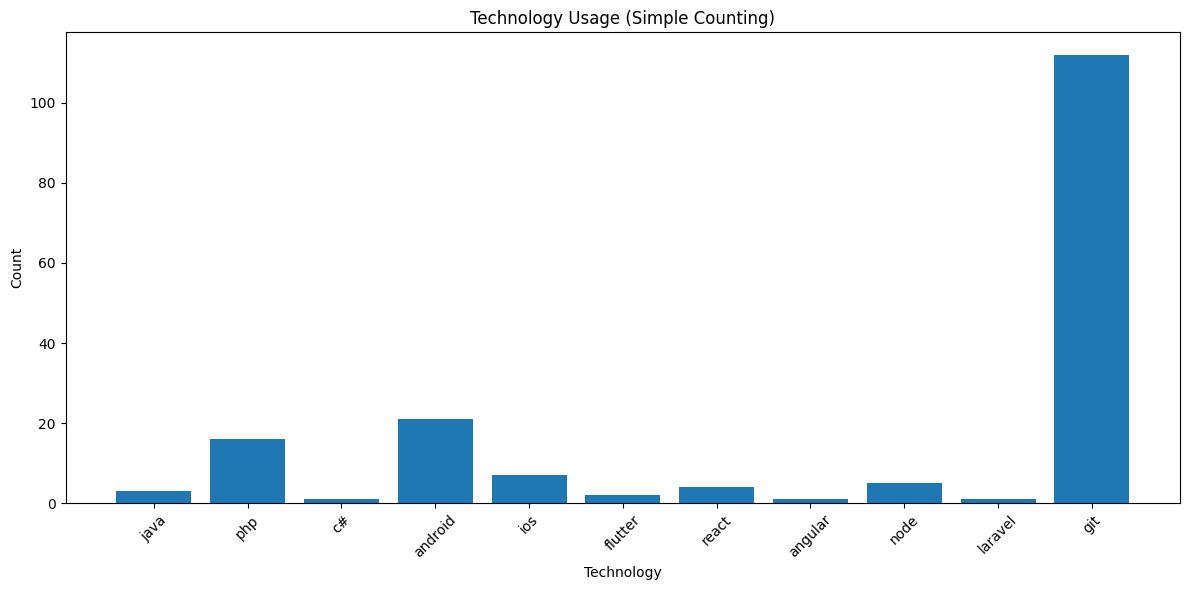

In [22]:
plt.figure(figsize=(12,6))
plt.bar(tech_count_clean.keys(), tech_count_clean.values())
plt.title("Technology Usage (Simple Counting)")
plt.xlabel("Technology")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
possible_cols = []

for c in df.columns:
    c_low = c.lower()
    if ("revenue" in c_low or 
        "income" in c_low or 
        "employee" in c_low or 
        "founded" in c_low or
        "year" in c_low or
        "size" in c_low):
        possible_cols.append(c)

print("Possible financial / growth columns:")
print(possible_cols)


if len(possible_cols) == 0:
    print("\nNo revenue, employees, or founded-year data found.")
else:
    print("\nSummary:")
    for c in possible_cols:
        print("\nColumn:", c)
        print(df[c].head())

Possible financial / growth columns:
[]

No revenue, employees, or founded-year data found.
